# EX1

GPT

In [12]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. Loading a pretrained model and tokenizer

In [15]:
# GPT-2 используется здесь для демонстрации; можно заменить на другие модели, например, "bert-base-uncased"
model_name = "gpt2" # Указываем имя модели GPT-2
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 — это казуальная языковая модель, что означает, что она предсказывает следующее слово в последовательности.
Она была обучена на разнообразном наборе данных и может генерировать связный, контекстуально релевантный текст.
""")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 — это казуальная языковая модель, что означает, что она предсказывает следующее слово в последовательности.
Она была обучена на разнообразном наборе данных и может генерировать связный, контекстуально релевантный текст.



# 2. Tokenize input text

Original Text: A process whose outcome is completely determined by the algorithm, the values of the input variables, and the initial state of the system.
Tokens: ['A', 'Ġprocess', 'Ġwhose', 'Ġoutcome', 'Ġis', 'Ġcompletely', 'Ġdetermined', 'Ġby', 'Ġthe', 'Ġalgorithm', ',', 'Ġthe', 'Ġvalues', 'Ġof', 'Ġthe', 'Ġinput', 'Ġvariables', ',', 'Ġand', 'Ġthe', 'Ġinitial', 'Ġstate', 'Ġof', 'Ġthe', 'Ġsystem', '.']
Token IDs: [32, 1429, 3025, 8055, 318, 3190, 5295, 416, 262, 11862, 11, 262, 3815, 286, 262, 5128, 9633, 11, 290, 262, 4238, 1181, 286, 262, 1080, 13]


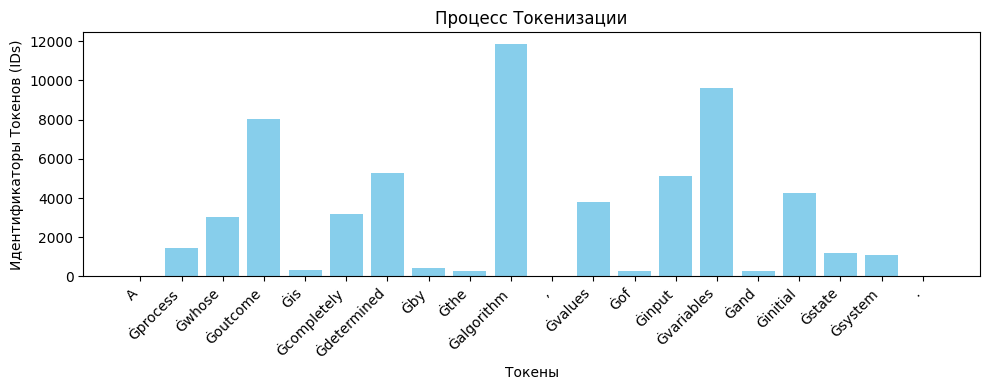

In [17]:
text = "A process whose outcome is completely determined by the algorithm, the values of the input variables, and the initial state of the system." # <-- Заполни это
tokens = tokenizer.tokenize(text) # Используем метод .tokenize() токенизатора, который мы загрузили
token_ids = tokenizer.convert_tokens_to_ids(tokens) # Преобразуем токены в их числовые ID

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

# 3. Visualizing the tokenization process
plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue") # Строим столбчатую диаграмму: токены по X, их ID по Y
plt.xlabel("Токены")
plt.ylabel("Идентификаторы Токенов (IDs)")
plt.title("Процесс Токенизации")
plt.xticks(rotation=45, ha='right') # Поворачиваем метки для лучшей читаемости
plt.tight_layout() # Корректируем расположение элементов
plt.show()

# Exercise 3

In [18]:
print("--- Токены и их ID ---")
for i in range(len(tokens)):
    print(f"Токен: '{tokens[i]}' -> ID: {token_ids[i]}")

print("\n") # Для лучшей читаемости

--- Токены и их ID ---
Токен: 'A' -> ID: 32
Токен: 'Ġprocess' -> ID: 1429
Токен: 'Ġwhose' -> ID: 3025
Токен: 'Ġoutcome' -> ID: 8055
Токен: 'Ġis' -> ID: 318
Токен: 'Ġcompletely' -> ID: 3190
Токен: 'Ġdetermined' -> ID: 5295
Токен: 'Ġby' -> ID: 416
Токен: 'Ġthe' -> ID: 262
Токен: 'Ġalgorithm' -> ID: 11862
Токен: ',' -> ID: 11
Токен: 'Ġthe' -> ID: 262
Токен: 'Ġvalues' -> ID: 3815
Токен: 'Ġof' -> ID: 286
Токен: 'Ġthe' -> ID: 262
Токен: 'Ġinput' -> ID: 5128
Токен: 'Ġvariables' -> ID: 9633
Токен: ',' -> ID: 11
Токен: 'Ġand' -> ID: 290
Токен: 'Ġthe' -> ID: 262
Токен: 'Ġinitial' -> ID: 4238
Токен: 'Ġstate' -> ID: 1181
Токен: 'Ġof' -> ID: 286
Токен: 'Ġthe' -> ID: 262
Токен: 'Ġsystem' -> ID: 1080
Токен: '.' -> ID: 13




# EX 4

Great, imagine: you wanted to be a world champion in judo. So, preliminary training is comparable to how you first have to learn to walk, sit, well, everything that a child learns. After that, you start learning techniques and rules of combat - and this is additional training.

# Exercise 5 : Generate Simple Text

In [19]:
# 1. Create a new variable 'text' (your input prompt)
input_text = "During judo training, when an athlete was performing an Uchi-Mata throw," # <-- Замени это на свой промпт

# 2. Encode the input text to token IDs
input_ids = tokenizer.encode(input_text, return_tensors='pt') # return_tensors='pt' возвращает PyTorch тензор

# 3. Generate output using the model
# max_length: максимальная длина сгенерированного текста (включая промпт)
# num_return_sequences: сколько разных вариантов генерации вернуть
output_ids = model.generate(input_ids, max_length=50, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)

# 4. Decode the generated token IDs back to text
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True) # [0] потому что num_return_sequences=1

print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: During judo training, when an athlete was performing an Uchi-Mata throw,
Generated Output: During judo training, when an athlete was performing an Uchi-Mata throw, he would often throw the ball at the opponent's feet. This was a common practice for many athletes.

The Uchi-Mata throw was a
